In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from StatTools.experimental.augmentation.perturbations import (
    add_noise,
    add_poisson_gaps,
)
from StatTools.experimental.analysis.tools import get_extra_h_dfa
import math

from research.kalman_filter.kalman_experiments import (
    get_signal,
    get_r_list,
    apply_kalman_filter,
)

### Experimental variables

| Variable              | Value                                     |
|-------------------------|----------------------------------------------|
| $ H $                 | $1/2$ to $3.5$, step is $1/4$              |
| Length of the forming filter, s   | open length |
| Order of the Kalman filter, r   | 2, 4, 8                                          |
| SNR     | $0.5, 1, 2$  |

In [2]:
H_LIST = np.arange(0.5, 3.75, 0.25)
TRJ_LEN_POW = 14
TRJ_LEN = 2**TRJ_LEN_POW

In [3]:
markers = [
    "o",  # circle
    "v",  # triangle_down
    "^",  # triangle_up
    "<",  # triangle_left
    ">",  # triangle_right
    "s",  # square
    "p",  # pentagon
    "*",  # star
    "h",  # hexagon
]

axis_fontsize = 14
label_fontsize = 14
legend_fontsize = 14
title_fontsize = 16

## Signal synthesis

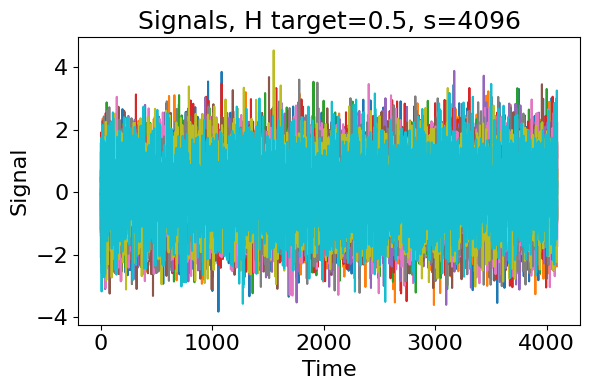

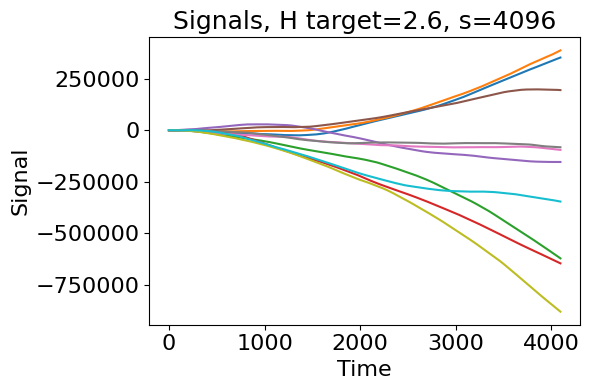

In [7]:
h = 0.5
s = TRJ_LEN
plt.figure(figsize=(6, 4))
for _ in range(10):
    signal = get_signal(h, TRJ_LEN, s)
    plt.plot(signal)

plt.title(f"Signals, H target={h}, s={s}", fontdict={"fontsize": 18})
plt.xlabel("Time", fontsize=16)
plt.ylabel("Signal", fontsize=16)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig(f"research/kalman_filter/out/signals_{h}.svg")
plt.show()

h = 2.6
s = TRJ_LEN
plt.figure(figsize=(6, 4))
for _ in range(10):
    signal = get_signal(h, TRJ_LEN, s)
    plt.plot(signal)

plt.title(f"Signals, H target={h}, s={s}", fontdict={"fontsize": 18})
plt.xlabel("Time", fontsize=16)
plt.ylabel("Signal", fontsize=16)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig(f"research/kalman_filter/out/signals_{h}.svg")
plt.show()

## Estimation of the synthesis error

In [8]:
test_df = pd.DataFrame(
    columns=[
        "H_target",
        "H_signal",
        "signal_len",
        "s",
    ]
)

In [9]:
s = TRJ_LEN
for h in H_LIST:
    for _ in range(15):
        signal = get_signal(h, TRJ_LEN, s)
        h_signal = get_extra_h_dfa(signal)
        test_df.loc[len(test_df)] = [
            h,
            h_signal,
            len(signal),
            s,
        ]

/Users/a1/Documents/GitHub/StatTools/StatTools/generators/kasdin_generator.py:128: UserWarning: H is not in range (0.5, 1.5). Using integration/differentiation.
  warnings.warn(
/Users/a1/Documents/GitHub/StatTools/StatTools/generators/kasdin_generator.py:128: UserWarning: H is not in range (0.5, 1.5). Using integration/differentiation.
  warnings.warn(
/Users/a1/Documents/GitHub/StatTools/StatTools/generators/kasdin_generator.py:128: UserWarning: H is not in range (0.5, 1.5). Using integration/differentiation.
  warnings.warn(
/Users/a1/Documents/GitHub/StatTools/StatTools/generators/kasdin_generator.py:128: UserWarning: H is not in range (0.5, 1.5). Using integration/differentiation.
  warnings.warn(
/Users/a1/Documents/GitHub/StatTools/StatTools/generators/kasdin_generator.py:128: UserWarning: H is not in range (0.5, 1.5). Using integration/differentiation.
  warnings.warn(
/Users/a1/Documents/GitHub/StatTools/StatTools/generators/kasdin_generator.py:128: UserWarning: H is not in ra

In [10]:
test_df["H_gen_diff"] = abs(test_df["H_target"] - test_df["H_signal"])

In [11]:
test_df

,H_target,H_signal,signal_len,s,H_gen_diff
0,0.5,0.516146,4096.0,4096.0,0.016146
1,0.5,0.518452,4096.0,4096.0,0.018452
2,0.5,0.528398,4096.0,4096.0,0.028398
3,0.5,0.536640,4096.0,4096.0,0.036640
4,0.5,0.512321,4096.0,4096.0,0.012321
...,...,...,...,...,...
220,4.0,3.956840,4096.0,4096.0,0.043160
221,4.0,3.954466,4096.0,4096.0,0.045534
222,4.0,3.973240,4096.0,4096.0,0.026760
223,4.0,3.957797,4096.0,4096.0,0.042203


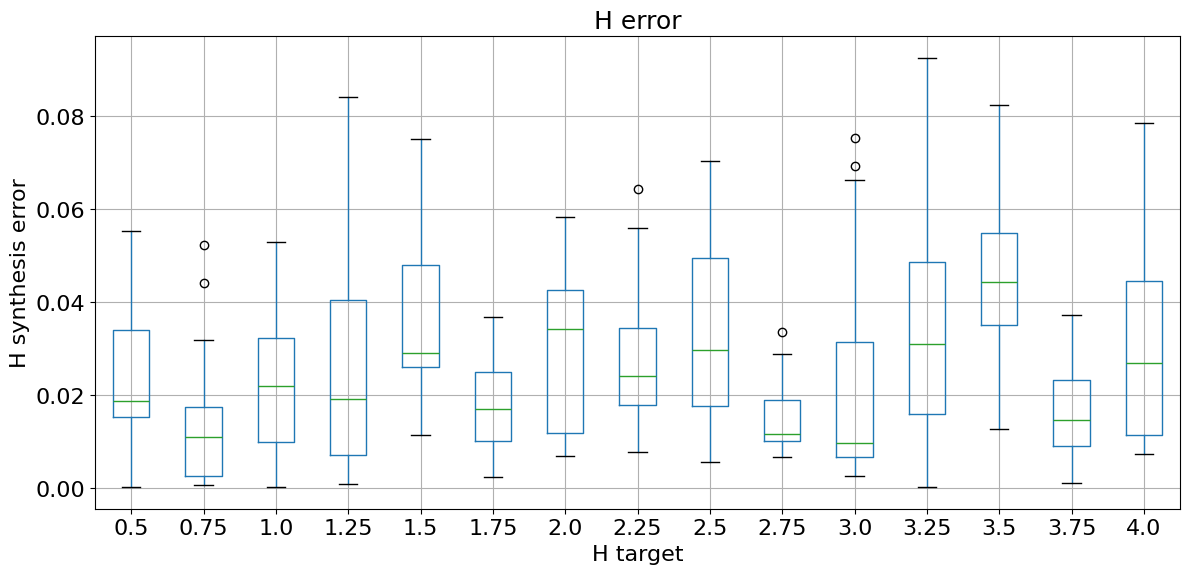

In [15]:
ax = test_df.boxplot(column="H_gen_diff", by="H_target", figsize=(12, 6))
plt.title("H error", fontdict={"fontsize": 18})
plt.suptitle("")
plt.xlabel("H target", fontsize=16)
plt.ylabel("H synthesis error", fontsize=16)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("research/kalman_filter/out/H_synthesis_error.svg")
plt.show()

## Эксперимент-Синтетика

### Gaps

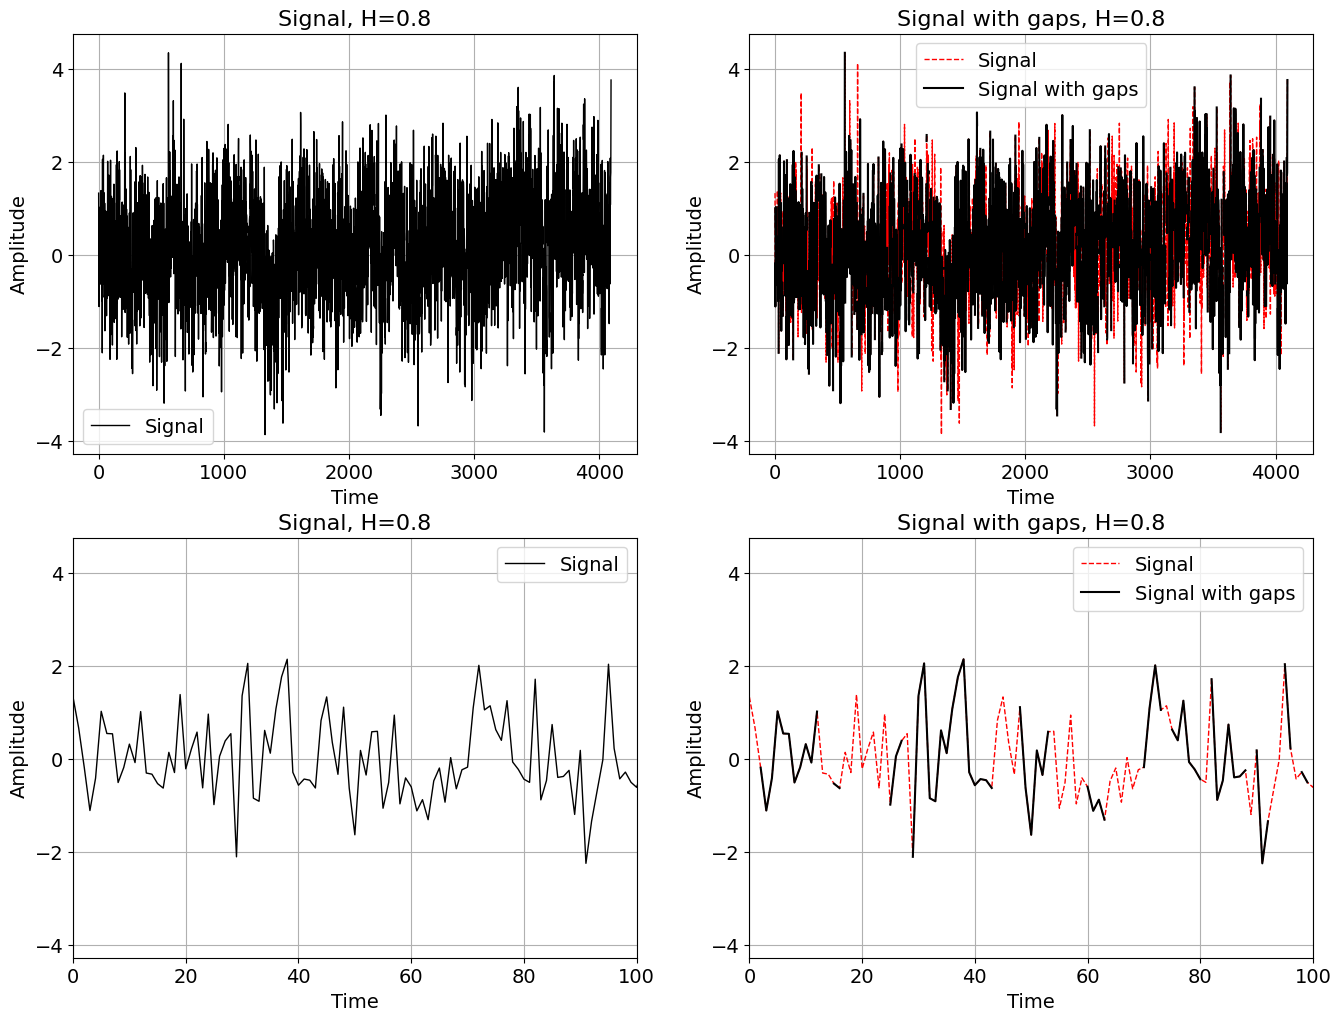

In [ ]:
s = TRJ_LEN
h = 0.8
generated_signal = get_signal(h, TRJ_LEN, s)
gaps_signal, gaps = add_poisson_gaps(generated_signal, 0.2, 2.0)

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.plot(generated_signal, label="Signal", color="black", linewidth=1)
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.grid(True)
plt.title(f"Signal, H={h}", fontdict={"fontsize": title_fontsize})

plt.subplot(2, 2, 2)
plt.plot(
    generated_signal,
    label="Signal",
    color="red",
    linestyle="--",
    linewidth=1,
)
plt.plot(gaps_signal, label="Signal with gaps", color="black")
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.grid(True)
plt.title(f"Signal with gaps, H={h}", fontdict={"fontsize": title_fontsize})

plt.subplot(2, 2, 3)
plt.plot(generated_signal, label="Signal", color="black", linewidth=1)
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.xlim(0, 100)
plt.grid(True)
plt.title(f"Signal, H={h}", fontdict={"fontsize": title_fontsize})

plt.subplot(2, 2, 4)
plt.plot(
    generated_signal,
    label="Signal",
    color="red",
    linestyle="--",
    linewidth=1,
)
plt.plot(gaps_signal, label="Signal with gaps", color="black")
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.grid(True)
plt.xlim(0, 100)
plt.title(f"Signal with gaps, H={h}", fontdict={"fontsize": title_fontsize})
plt.show()


In [ ]:
metrics_df = pd.DataFrame(
    columns=[
        "H_target",
        "H_signal",
        "H_restored",
        "signal_len",
        "s",
        "r",
        "Gaps",
        "SE",
    ]
)

In [ ]:
# one process version with plot
s = TRJ_LEN
axis_fontsize = 14
label_fontsize = 14
legend_fontsize = 14
title_fontsize = 16
n = 2
for h in H_LIST[0:3]:
    se_dict = {}
    for r in get_r_list():
        se_dict[r] = []

    for i in range(n):
        signal = get_signal(h, TRJ_LEN, s, normalize=False)
        if i == 0:
            plt.figure(figsize=(14, 4))
        snr = 0.5
        new_signal = signal
        if get_extra_h_dfa(signal) > 1.5:
            new_signal = np.diff(signal)
        noisy_signal, noise = add_noise(new_signal, ratio=snr)

        r_list = get_r_list()
        h_s = get_extra_h_dfa(signal)
        for r in r_list:
            estimated_signal = apply_kalman_filter(
                new_signal, noisy_signal, h, r, noise
            )
            if get_extra_h_dfa(signal) > 1.5:
                estimated_signal = np.cumsum(estimated_signal)

            se = np.nanstd(signal[0 : len(estimated_signal)] - estimated_signal)
            se_dict[r].append(se)

            h_est = get_extra_h_dfa(estimated_signal)
            if i == 0:
                plt.plot(
                    estimated_signal,
                    label=f"Filter output ({r}), SE={se:.3f}, Hs={h_s:.2f}, He={h_est:.2f}",
                    alpha=0.5,
                )

            metrics_df.loc[len(metrics_df)] = [
                h,
                h_s,
                h_est,
                len(signal),
                s,
                r,
                snr,
                se,
            ]

        if i == 0:
            plt.plot(
                signal,
                label="Signal",
                color="red",
                alpha=0.5,
                linewidth=1,
            )
            plt.xlabel("Time", fontsize=axis_fontsize)
            plt.ylabel("Amplitude", fontsize=axis_fontsize)
            # plt.xlim(2000, 2100)
            plt.legend(fontsize=legend_fontsize)
            plt.tick_params(labelsize=label_fontsize)
            plt.title(
                f"Result of the filtering, $\\hat{{H}}=${h}, SNR={snr}",
                fontdict={"fontsize": title_fontsize},
            )
            plt.grid(True)
            plt.show()

    for k, v in se_dict.items():
        print(f"H={h}, SE (order {k}): {np.mean(v):.3f}+-{np.std(v):.3f}")

#### Analysis

### Noise

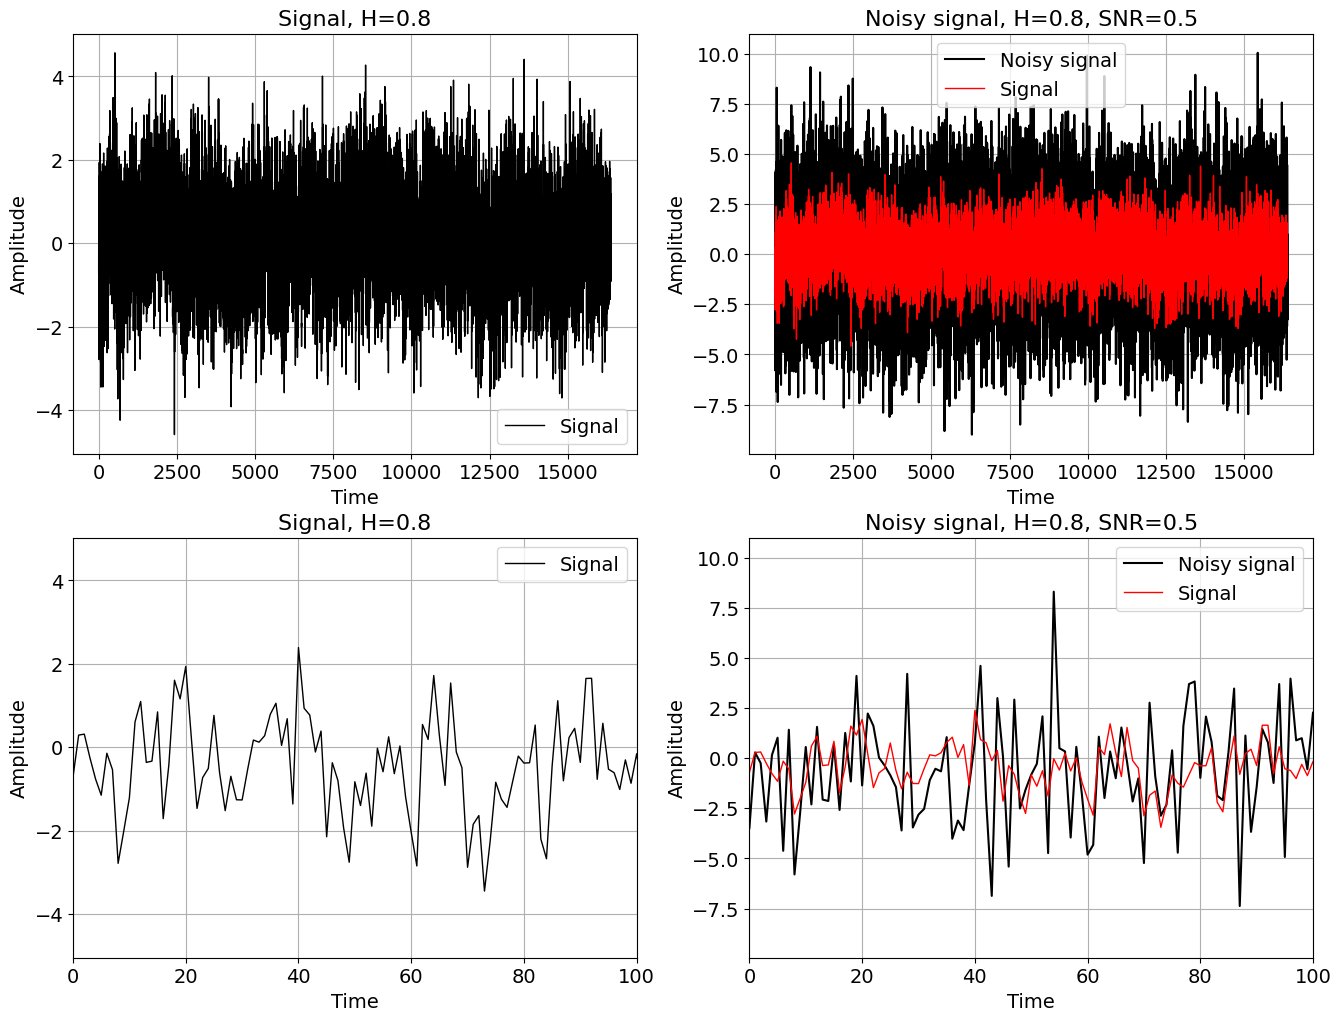

In [4]:
s = TRJ_LEN
h = 0.8
generated_signal = get_signal(h, TRJ_LEN, s)
snr = 0.5
noisy_signal, _ = add_noise(generated_signal, snr)

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.plot(generated_signal, label="Signal", color="black", linewidth=1)
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.grid(True)
plt.title(f"Signal, H={h}", fontdict={"fontsize": title_fontsize})

plt.subplot(2, 2, 2)
plt.plot(noisy_signal, label="Noisy signal", color="black")
plt.plot(
    generated_signal,
    label="Signal",
    color="red",
    linewidth=1,
)
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.grid(True)
plt.title(f"Noisy signal, H={h}, SNR={snr}", fontdict={"fontsize": title_fontsize})

plt.subplot(2, 2, 3)
plt.plot(generated_signal, label="Signal", color="black", linewidth=1)
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.xlim(0, 100)
plt.grid(True)
plt.title(f"Signal, H={h}", fontdict={"fontsize": title_fontsize})

plt.subplot(2, 2, 4)
plt.plot(noisy_signal, label="Noisy signal", color="black")
plt.plot(
    generated_signal,
    label="Signal",
    color="red",
    linewidth=1,
)
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.grid(True)
plt.xlim(0, 100)
plt.title(f"Noisy signal, H={h}, SNR={snr}", fontdict={"fontsize": title_fontsize})
plt.show()


In [5]:
metrics_df = pd.DataFrame(
    columns=[
        "H_target",
        "H_signal",
        "H_restored",
        "signal_len",
        "s",
        "r",
        "SNR",
        "SE",
    ]
)

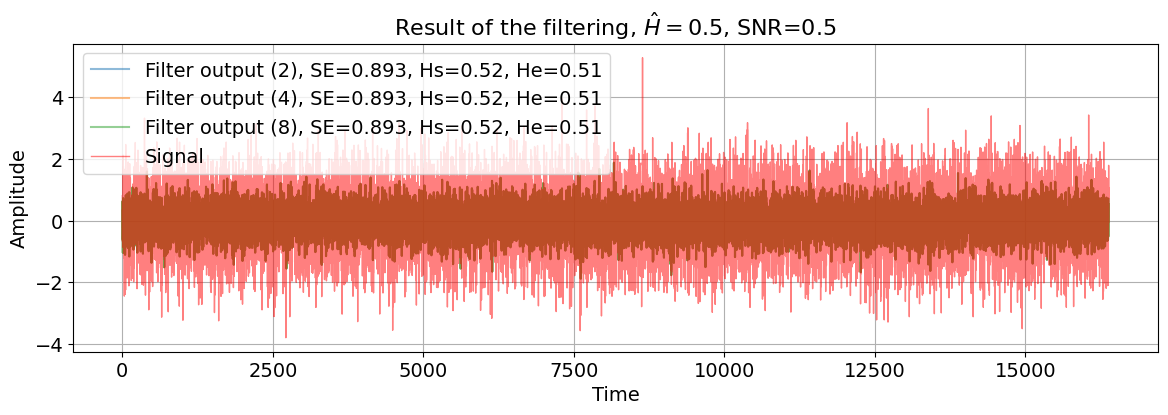

H=0.5, SE (order 2): 0.891+-0.002
H=0.5, SE (order 4): 0.891+-0.002
H=0.5, SE (order 8): 0.891+-0.002


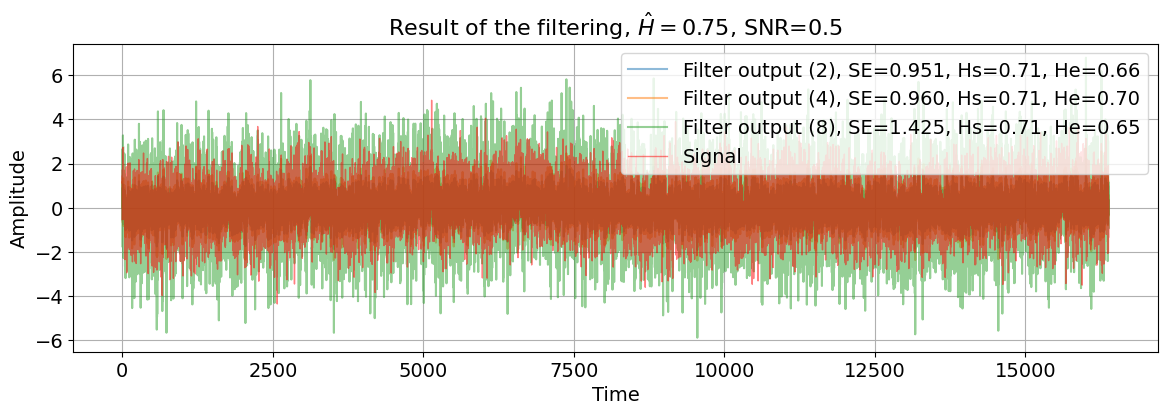

H=0.75, SE (order 2): 0.951+-0.001
H=0.75, SE (order 4): 0.959+-0.001
H=0.75, SE (order 8): 1.426+-0.001


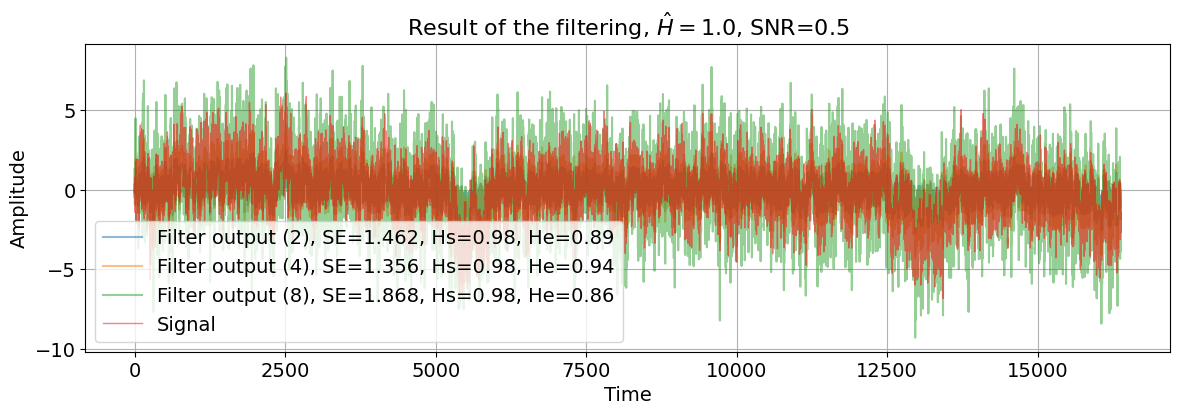

H=1.0, SE (order 2): 1.473+-0.011
H=1.0, SE (order 4): 1.364+-0.008
H=1.0, SE (order 8): 1.878+-0.009


In [6]:
# one process version with plot
s = TRJ_LEN
axis_fontsize = 14
label_fontsize = 14
legend_fontsize = 14
title_fontsize = 16
n = 2
for h in H_LIST[0:3]:
    se_dict = {}
    for r in get_r_list():
        se_dict[r] = []

    for i in range(n):
        signal = get_signal(h, TRJ_LEN, s, normalize=False)
        if i == 0:
            plt.figure(figsize=(14, 4))
        snr = 0.5
        new_signal = signal
        if get_extra_h_dfa(signal) > 1.5:
            new_signal = np.diff(signal)
        noisy_signal, noise = add_noise(new_signal, ratio=snr)

        r_list = get_r_list()
        h_s = get_extra_h_dfa(signal)
        for r in r_list:
            estimated_signal = apply_kalman_filter(
                new_signal, noisy_signal, h, r, noise
            )
            if get_extra_h_dfa(signal) > 1.5:
                estimated_signal = np.cumsum(estimated_signal)

            se = np.nanstd(signal[0 : len(estimated_signal)] - estimated_signal)
            se_dict[r].append(se)

            h_est = get_extra_h_dfa(estimated_signal)
            if i == 0:
                plt.plot(
                    estimated_signal,
                    label=f"Filter output ({r}), SE={se:.3f}, Hs={h_s:.2f}, He={h_est:.2f}",
                    alpha=0.5,
                )

            metrics_df.loc[len(metrics_df)] = [
                h,
                h_s,
                h_est,
                len(signal),
                s,
                r,
                snr,
                se,
            ]

        if i == 0:
            plt.plot(
                signal,
                label="Signal",
                color="red",
                alpha=0.5,
                linewidth=1,
            )
            plt.xlabel("Time", fontsize=axis_fontsize)
            plt.ylabel("Amplitude", fontsize=axis_fontsize)
            # plt.xlim(2000, 2100)
            plt.legend(fontsize=legend_fontsize)
            plt.tick_params(labelsize=label_fontsize)
            plt.title(
                f"Result of the filtering, $\\hat{{H}}=${h}, SNR={snr}",
                fontdict={"fontsize": title_fontsize},
            )
            plt.grid(True)
            plt.show()

    for k, v in se_dict.items():
        print(f"H={h}, SE (order {k}): {np.mean(v):.3f}+-{np.std(v):.3f}")

In [ ]:
metrics_df.to_csv("research/kalman_filter/out/kalman-kasdin-noise.csv", index=False)

#### Analysis

In [10]:
metrics_df = pd.read_csv("research/kalman_filter/out/kalman-kasdin-noise.csv")
metrics_df.head()

,H_target,H_signal,H_restored,signal_len,s,r,SNR,SE
0,0.5,0.516293,0.513289,16384.0,16384.0,2.0,0.5,0.893097
1,0.5,0.516293,0.513289,16384.0,16384.0,4.0,0.5,0.893097
2,0.5,0.516293,0.513289,16384.0,16384.0,8.0,0.5,0.893097
3,0.5,0.533787,0.517719,16384.0,16384.0,2.0,0.5,0.889185
4,0.5,0.533787,0.517719,16384.0,16384.0,4.0,0.5,0.889185


In [11]:
metrics_df["H_restore_diff"] = abs(metrics_df["H_signal"] - metrics_df["H_restored"])
metrics_df["H_gen_diff"] = abs(metrics_df["H_target"] - metrics_df["H_signal"])

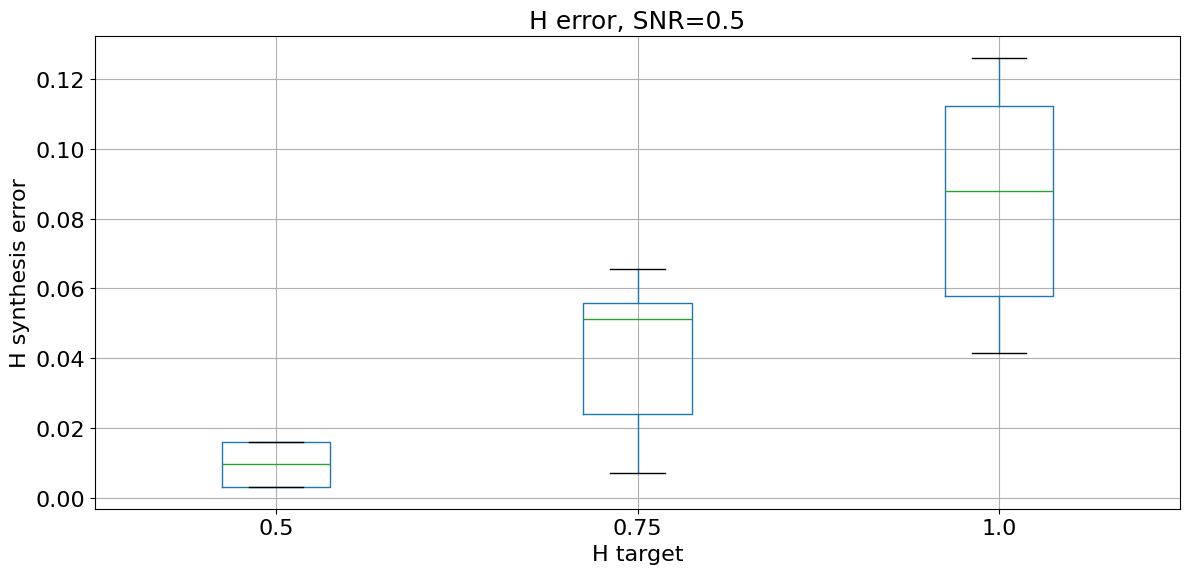

In [22]:
for snr in metrics_df["SNR"].unique():
    part_metrics_df = metrics_df[metrics_df["SNR"] == snr]
    ax = part_metrics_df.boxplot(column="H_restore_diff", by="H_target", figsize=(12, 6))
    plt.title(f"H error, SNR={snr}", fontdict={"fontsize": 18})
    plt.suptitle("")
    plt.xlabel("H target", fontsize=16)
    plt.ylabel("H synthesis error", fontsize=16)
    plt.tick_params(labelsize=16)
    plt.tight_layout()
    plt.show()

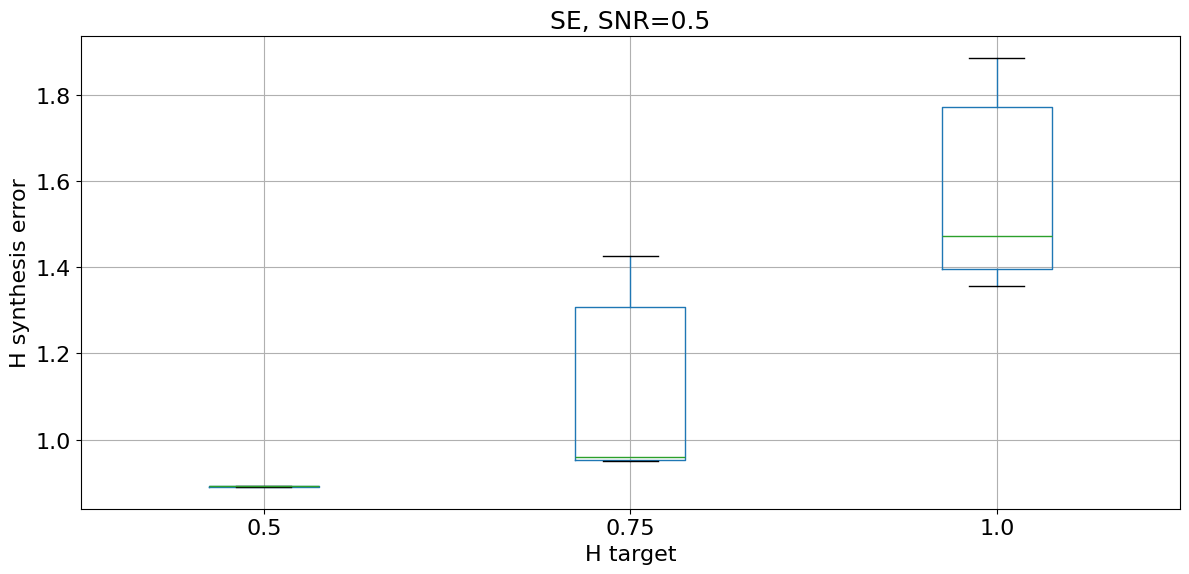

In [23]:
for snr in metrics_df["SNR"].unique():
    part_metrics_df = metrics_df[metrics_df["SNR"] == snr]
    ax = part_metrics_df.boxplot(column="SE", by="H_target", figsize=(12, 6))
    plt.title(f"SE, SNR={snr}", fontdict={"fontsize": 18})
    plt.suptitle("")
    plt.xlabel("H target", fontsize=16)
    plt.ylabel("H synthesis error", fontsize=16)
    plt.tick_params(labelsize=16)
    plt.tight_layout()
    plt.show()